<a href="https://colab.research.google.com/github/Hyubbbb/EPOCH_LinearAlgebra/blob/main/h_Jiyun/Chapter7_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 연습 문제 7-3
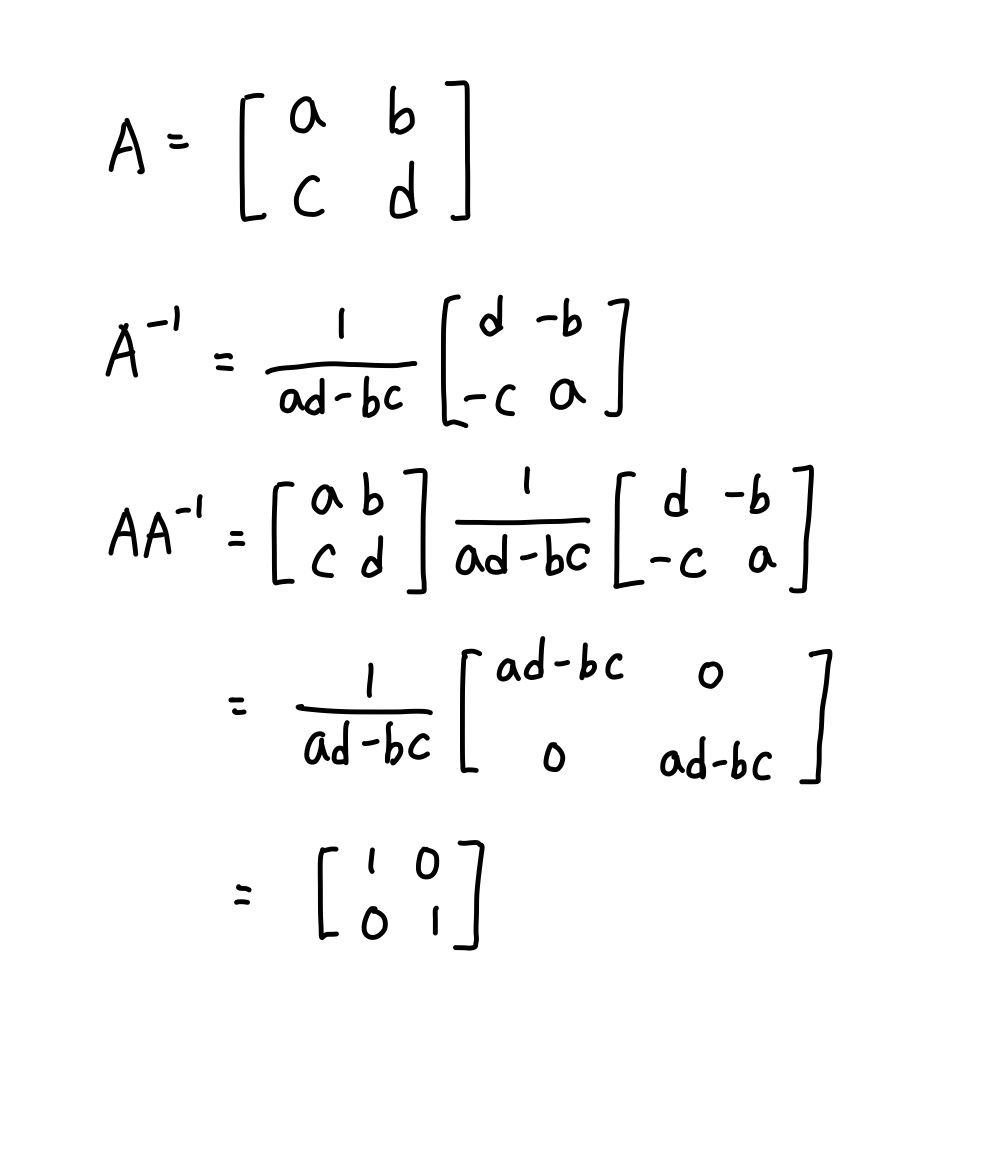

## 연습 문제 7-4

### 오른쪽 역행렬 유도

In [ ]:
T = np.random.randint(-10,11,size=(4,40))
TtT = T @ T.T
TtT_inv = np.linalg.inv(TtT)
R = T.T @ TtT_inv

T@R

array([[ 1.00000000e+00,  9.54097912e-18,  2.79724161e-17,
         2.16840434e-18],
       [-3.64291930e-17,  1.00000000e+00, -1.60461922e-17,
         9.54097912e-18],
       [-1.73472348e-18, -5.20417043e-18,  1.00000000e+00,
         1.38777878e-17],
       [-2.42861287e-17, -2.16840434e-17,  1.62630326e-17,
         1.00000000e+00]])

### 시각화

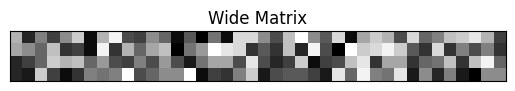

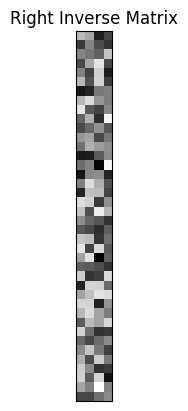

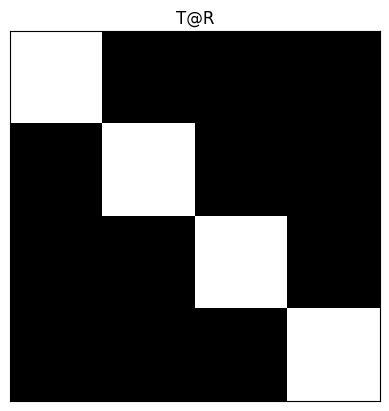

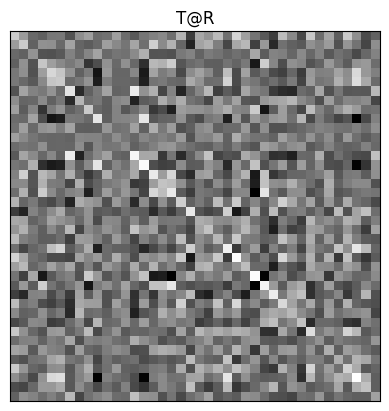

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(T, cmap='gray')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.title('Wide Matrix')
plt.show()

plt.imshow(R, cmap='gray')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.title('Right Inverse Matrix')

plt.show()

plt.imshow(T@R, cmap='gray')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.title('T@R')

plt.show()

plt.imshow(R@T, cmap='gray')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.title('T@R')

plt.show()

## 연습 문제 7-5

의사역행렬 =  가역 행렬의 완전 역행렬

In [ ]:
import numpy as np
A = np.random.rand(10, 10)
A_inv = np.linalg.inv(A)
A_pinv = np.linalg.pinv(A)

print(np.allclose(A_inv, A_pinv))

True


의사역행렬 = 높은 최대열계수 행렬의 왼쪽 역행렬

In [ ]:
B = np.random.rand(10, 5) # 높은 행렬

BtB = B.T @ B
BtB_inv = np.linalg.inv(BtB)
L = BtB_inv @ B.T # 왼쪽 역행렬

B_pinv = np.linalg.pinv(B) # 의사역행렬

print(np.allclose(L, B_pinv))

True


의사역행렬 = 넓은 최대열계수 행렬의 오른쪽 역행렬

In [ ]:
C = np.random.rand(5, 10) # 넓은 행렬

CtC = C @ C.T
CtC_inv = np.linalg.inv(CtC)
R = C.T @ CtC_inv # 오른쪽 역행렬

C_pinv = np.linalg.pinv(C) # 의사역행렬

print(np.allclose(R, C_pinv))

True


## 연습 문제 7-9

### 5X5 힐버트 행렬

In [ ]:
A = [[0]*5 for i in range(5)]
for i in range(5):
  for j in range(5):
    A[i][j]=1/(i+j+1)
print(A)

[[1.0, 0.5, 0.3333333333333333, 0.25, 0.2], [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666], [0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285], [0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125], [0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111]]


### 힐버트 행렬 시각화

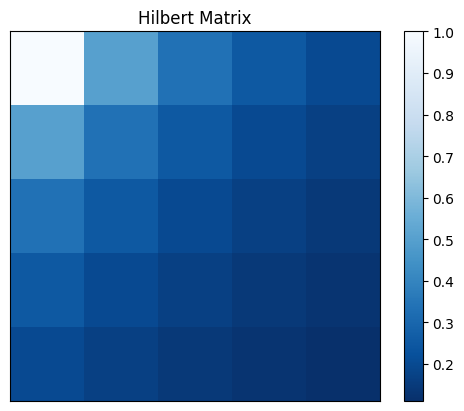

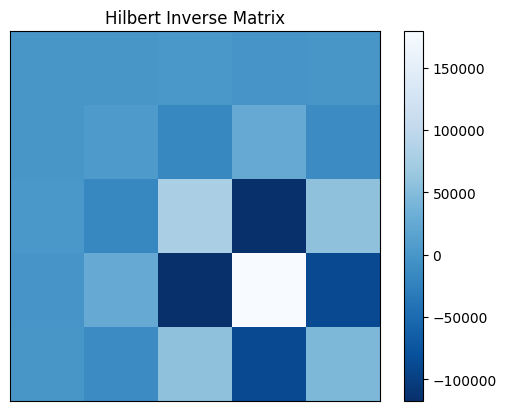

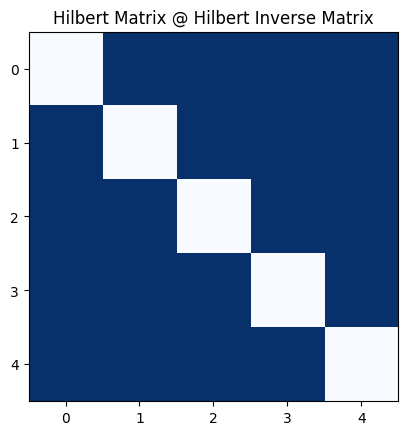

In [ ]:
import matplotlib.pyplot as plt

Ainv = np.linalg.inv(A)

plt.imshow(A, cmap='Blues_r')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.title('Hilbert Matrix')
plt.colorbar()
plt.show()

plt.imshow(Ainv, cmap='Blues_r')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.title('Hilbert Inverse Matrix')
plt.colorbar()
plt.show()

plt.imshow(A@Ainv, cmap='Blues_r')
plt.title('Hilbert Matrix @ Hilbert Inverse Matrix')
plt.show()

## 연습 문제 7-10

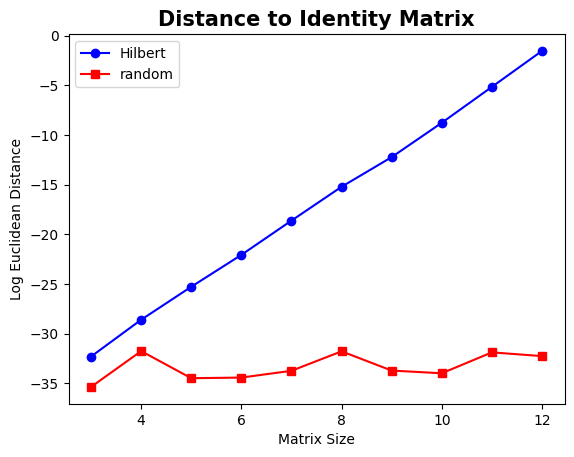

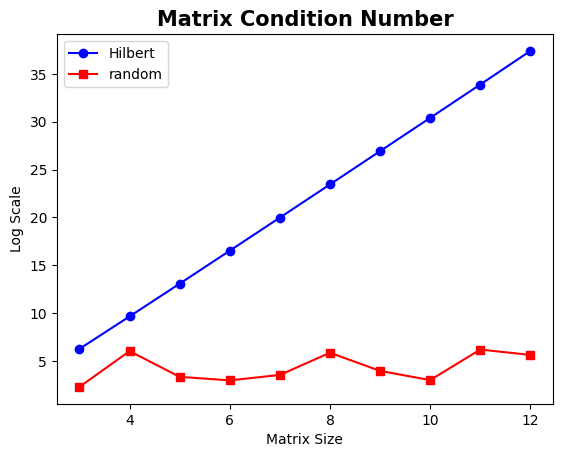

In [143]:
from scipy.linalg import hilbert
import matplotlib.pyplot as plt

size = np.arange(3, 13)

Adist=[]
Bdist=[]
A_cond=[]
B_cond=[]
for i in size:
  A = hilbert(i)
  A_inv = np.linalg.inv(A)
  AA_inv = A@A_inv
  I = np.eye(i)
  Adist.append(np.sqrt(np.sum((AA_inv-I)**2))) # 단위 행렬까지의 유클리드 거리
  A_cond.append(np.linalg.cond(A))


  B = np.random.rand(i,i)
  B_inv = np.linalg.inv(B)
  BB_inv = B@B_inv
  Bdist.append(np.sqrt(np.sum((BB_inv-I)**2)))
  B_cond.append(np.linalg.cond(B))

# 시각화
plt.plot(size, np.log(Adist), 'bo-', label='Hilbert')
plt.plot(size, np.log(Bdist), 'rs-', label='random')
plt.title('Distance to Identity Matrix', size=15, fontweight='bold')
plt.legend()
plt.xlabel('Matrix Size', size=10)
plt.ylabel('Log Euclidean Distance', size=10)
plt.show()

plt.plot(size, np.log(A_cond), 'bo-', label='Hilbert')
plt.plot(size, np.log(B_cond), 'rs-', label='random')
plt.title('Matrix Condition Number', size=15, fontweight='bold')
plt.legend()
plt.xlabel('Matrix Size', size=10)
plt.ylabel('Log Scale', size=10)
plt.show()
